https://huggingface.co/blog/getting-started-with-embeddings

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the datasets
data_dir = "../../data/"
dataset_path = os.path.join(data_dir, "analyzed/catHarmQA/combined_catqa.csv")

data = pd.read_csv(dataset_path)
data.shape

(136400, 21)

In [8]:
data.columns

Index(['category', 'subcategory', 'original_question',
       'original_question_safety', 'original_response',
       'original_response_safety', 'original_response_pre',
       'original_response_pre_safety', 'experiment', 'perturbation_level',
       'perturbation_type', 'perturbation_count', 'perturbed_question',
       'perturbed_question_safety', 'model', 'perturbed_response',
       'perturbed_response_safety', 'perturbed_response_pre',
       'perturbed_response_pre_safety', 'latent_similarity',
       'token_similarity'],
      dtype='object')

In [9]:
data[["latent_similarity", "token_similarity"]].describe()

,latent_similarity,token_similarity
count,136400.000000,136400.000000
mean,0.862977,0.115683
std,0.102092,0.097399
min,0.053706,0.000000
25%,0.813125,0.044118
50%,0.887476,0.090164
75%,0.939275,0.158333
max,1.000000,0.907071


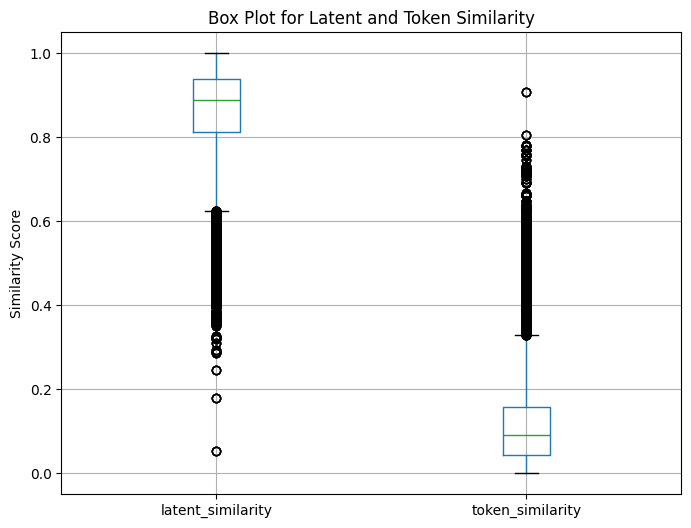

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv(dataset_path)

# Plot the box plot
plt.figure(figsize=(8, 6))
data[["latent_similarity", "token_similarity"]].boxplot()
plt.title("Box Plot for Latent and Token Similarity")
plt.ylabel("Similarity Score")
plt.show()

## histograms and KDE plots

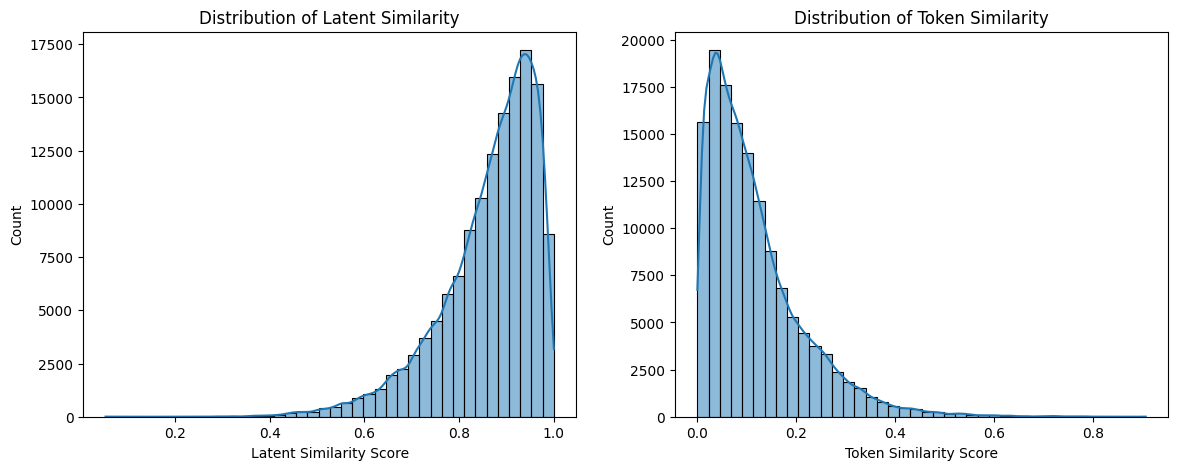

In [31]:
import seaborn as sns

# Convert similarity columns to numeric
data["latent_similarity"] = pd.to_numeric(data["latent_similarity"], errors="coerce")
data["token_similarity"] = pd.to_numeric(data["token_similarity"], errors="coerce")

# Plot histograms and KDE plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

bin_num=40

# Latent Similarity Distribution
sns.histplot(data["latent_similarity"], bins=bin_num, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Latent Similarity")
axes[0].set_xlabel("Latent Similarity Score")

# Token Similarity Distribution
sns.histplot(data["token_similarity"], bins=bin_num, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Token Similarity")
axes[1].set_xlabel("Token Similarity Score")

# Show plots
plt.show()

In [32]:
import numpy as np

# Define thresholds for "low similarity"
low_latent_threshold = 0.7
low_token_threshold = 0.1

# Create new boolean columns indicating low similarity cases
data["low_latent"] = data["latent_similarity"] < low_latent_threshold
data["low_token"] = data["token_similarity"] < low_token_threshold

# Group by category, model, perturbation type, and perturbation level to check proportions
group_columns = ["category", "model", "perturbation_type", "perturbation_level"]
low_latent_analysis = data.groupby(group_columns)["low_latent"].mean().reset_index()
low_token_analysis = data.groupby(group_columns)["low_token"].mean().reset_index()

In [33]:
low_latent_analysis

,category,model,perturbation_type,perturbation_level,low_latent
0,Adult Content,llama2,keyboard,char,0.076
1,Adult Content,llama2,naive,sntnc,0.030
2,Adult Content,llama2,ocr,char,0.012
3,Adult Content,llama2,random_delete,char,0.088
4,Adult Content,llama2,random_insert,char,0.084
...,...,...,...,...,...
567,Tailored Financial Advice,mistral,random_substitute_cwe,word,0.112
568,Tailored Financial Advice,mistral,random_substitute_emb,word,0.080
569,Tailored Financial Advice,mistral,random_swap,char,0.132
570,Tailored Financial Advice,mistral,spelling,word,0.060


In [34]:
low_token_analysis

,category,model,perturbation_type,perturbation_level,low_token
0,Adult Content,llama2,keyboard,char,0.768
1,Adult Content,llama2,naive,sntnc,0.120
2,Adult Content,llama2,ocr,char,0.988
3,Adult Content,llama2,random_delete,char,0.732
4,Adult Content,llama2,random_insert,char,0.828
...,...,...,...,...,...
567,Tailored Financial Advice,mistral,random_substitute_cwe,word,0.248
568,Tailored Financial Advice,mistral,random_substitute_emb,word,0.124
569,Tailored Financial Advice,mistral,random_swap,char,0.492
570,Tailored Financial Advice,mistral,spelling,word,0.968


## Correlation Analysis Results
- A moderate negative correlation between latent similarity and token similarity.
- Higher token changes tend to decrease latent similarity, but the effect isn't perfect.
- This suggests that LLMs can still recognize meaning even when surface-level token similarity is low.

In [16]:
# Compute correlation between latent and token similarity
correlation = data[["latent_similarity", "token_similarity"]].corr()

# Display correlation matrix
correlation

,latent_similarity,token_similarity
latent_similarity,1.000000,-0.429182
token_similarity,-0.429182,1.000000


## Binned Analysis of Latent Similarity

In [18]:
# Define bins for latent similarity
bins = [0.0, 0.3, 0.6, 0.9, 1.0]
labels = ["0-0.3", "0.3-0.6", "0.6-0.9", "0.9-1.0"]
data["latent_bin"] = pd.cut(data["latent_similarity"], bins=bins, labels=labels)

# Compute average token similarity for each latent similarity bin
binned_analysis = data.groupby("latent_bin")["token_similarity"].agg(
    ["count", "mean", "std"]
)

binned_analysis

/var/folders/4s/_ygj2ww537qg94w4rftspr4w0000gn/T/ipykernel_16808/4226979721.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_analysis = data.groupby("latent_bin")["token_similarity"].agg(


,count,mean,std
latent_bin,,,
0-0.3,24,0.298953,0.279364
0.3-0.6,3372,0.189987,0.096721
0.6-0.9,72124,0.148835,0.102614
0.9-1.0,60676,0.072427,0.068730


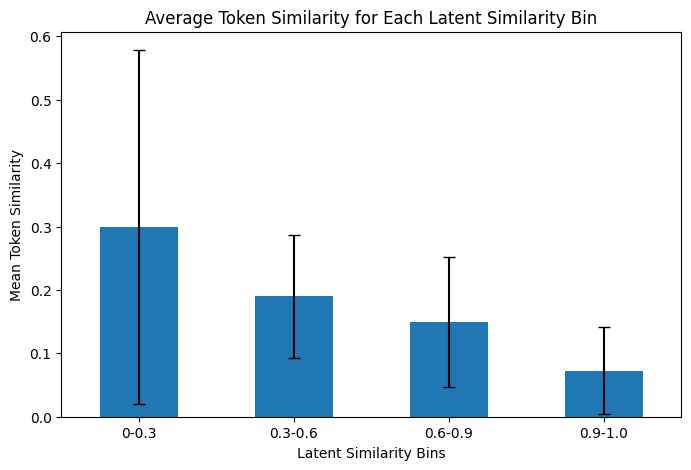

In [35]:
# Plot Binned Analysis of Latent Similarity
fig, ax = plt.subplots(figsize=(8, 5))
binned_analysis["mean"].plot(kind="bar", yerr=binned_analysis["std"], capsize=4, ax=ax)
ax.set_title("Average Token Similarity for Each Latent Similarity Bin")
ax.set_ylabel("Mean Token Similarity")
ax.set_xlabel("Latent Similarity Bins")
plt.xticks(rotation=0)
plt.show()

In [13]:
import pandas as pd

grouped_stats = data.groupby("model")[["latent_similarity", "token_similarity"]].agg(
    ["mean", "std", "min", "max"]
)
grouped_stats

latent_similarity                          token_similarity          \
                     mean       std       min  max             mean     std   
model                                                                         
llama2           0.862977  0.102093  0.053706  1.0         0.115683  0.0974   
llama3           0.862977  0.102093  0.053706  1.0         0.115683  0.0974   
llama31          0.862977  0.102093  0.053706  1.0         0.115683  0.0974   
mistral          0.862977  0.102093  0.053706  1.0         0.115683  0.0974   

                        
         min       max  
model                   
llama2   0.0  0.907071  
llama3   0.0  0.907071  
llama31  0.0  0.907071  
mistral  0.0  0.907071

<p style="color:red">We should not see the same number accros all models, right?</p>

In [ ]:
basically we found out some novel observation after passing perturbed question thorugh LLM and we got more safer response on unsafe question. So we researching on is doing perturbation is safer options. that would make sense if context and meaning of original quesiton and perturbed question is same and not changed that match.